# Supervised Machine Learning Models Using Scikit-Learn - Predicting Car Prices and Classes and Interpreting Results

upload data to notebook and import relevant libraries

In [10]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plot
import matplotlib.image as mpimg
from IPython.display import Image

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_log_error
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#!pip install GraphViz
#!conda install graphviz
import graphviz
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

import pydotplus

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols

import seaborn as sns
import warnings

from scipy.stats.stats import pearsonr
warnings.filterwarnings('ignore') 

# 1 The dataset - CAR DETAILS

The dataset presents cars of different brands and other features such as km driven, year of production and selling price.  

Dependent variable (DV) = "selling_price". Depends on independent variables (IV) such as year of manufacturing, km driven, number of children of the owner, brand of the car (categorical), seller type (individual, dealer or trustmark dealer), transmission (automatic or manual) and ownership (first or further). 

Let's have a look at the data.

In [2]:
data = pd.read_csv(r"C:\\Users\\zohar\\python_class\\CAR DETAILS.csv", index_col=0) #open and read csv file as a dataframe. equivalent to pd.DataFrame()
print(f"Loaded {data.shape[0]}x{data.shape[1]}") #see no of instances and no of cols
data.head() 

Loaded 4340x9


,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,#_owner_children
id,,,,,,,,,
1,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner,3
2,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner,0
3,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner,4
4,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner,5
5,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2


A multiple linear regression was calculated to predict the selling price of a car based on all features given in the dataset. Observed prices are already given in the data and can be seen below.

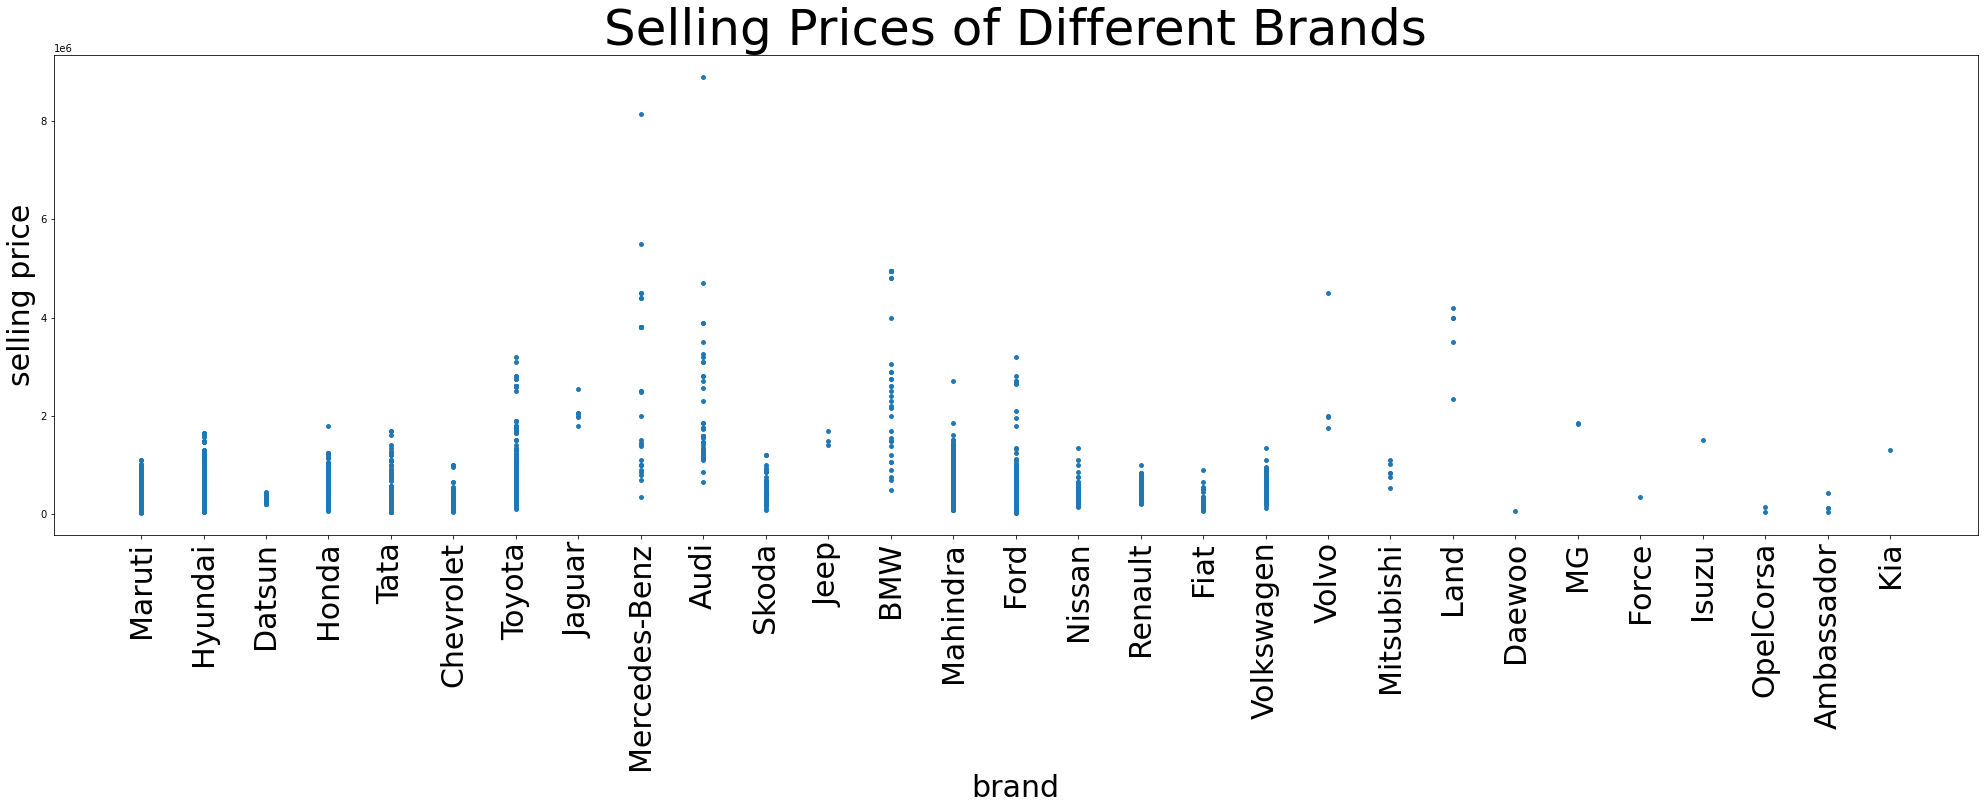

In [3]:
plot.figure(figsize=(200,30))
ax = plot.subplot(3,5,1)
data.plot.scatter(x='brand', y= 'selling_price',marker='o',s=15, ax=ax)
plot.xticks(fontsize=30, rotation = 90)
plot.ylabel('selling price', fontsize=30)
plot.xlabel('brand', fontsize=30)
plot.title('Selling Prices of Different Brands', fontsize = 50)
plot.show()

We can look at the correlations between the selling price and all other features and assume which ones may have a significant effect on the selling price outcome. We'll look at the coefficients of the model once we run it, and get more spot on results. 

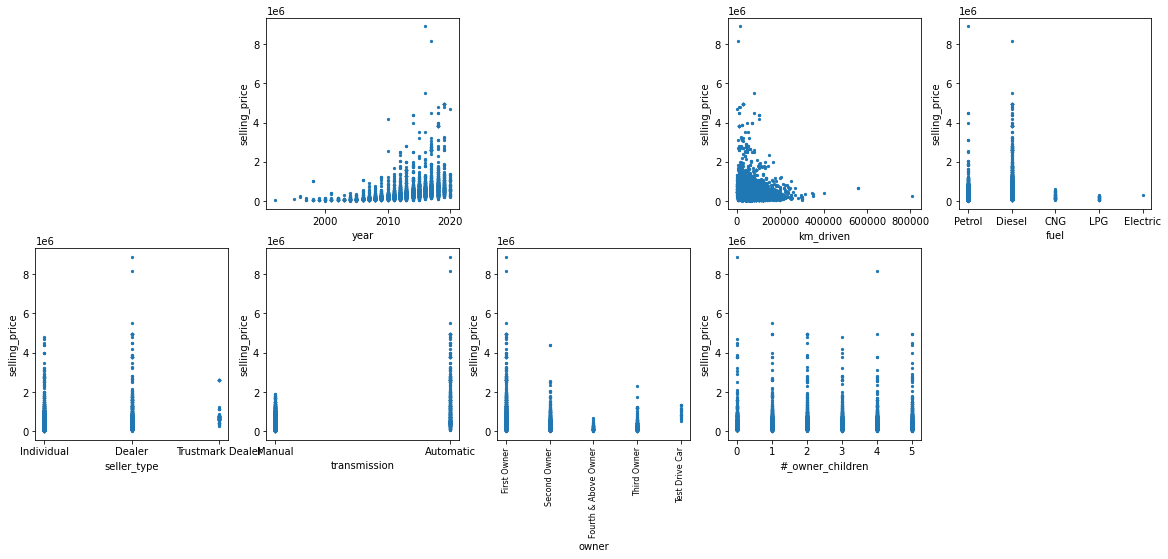

In [4]:
plot.figure(figsize=(20,12))
for i,feature_name in enumerate(data.columns):
    if (feature_name == 'brand') or (feature_name == 'selling_price'):
        continue
    else:
        ax = plot.subplot(3,5,i+1)
        data.plot.scatter(x=feature_name, y= 'selling_price',marker='o',s=5, ax=ax)
        if feature_name == 'owner': 
            plot.xticks(fontsize=8, rotation = 90)
plot.show()

correlations between the dependent variable 'selling_price' (y) and the independent features (x_i). The number of children of the car owner seem to be unrelated to the selling price of the car. Seller type is weakly correlated with selling price since there is not strong linear line forming so that the type of seller affects price. Dealers sell the highest priced cars but also cars of the mouse varying prices. Owner degree has a weak correlation to selling price such as that as there is no linear line forming so that as the serial number of ownership increases, the selling price of the car lowers. There seems to be a moderate correlation between km driven and the selling price such as that the higher the kilometrage, the lower the selling price is. There's a moderate-strong correlation between the year and the selling price such as that the later the year the higher the selling price is. Fuel seems to be weakly correlated as well, as fuel type increases selling type such as the higher prices are of cars that use Petrol or Diesel as gas, however these cars' prices vary. Automatic cars are prices more vastly and get pricier in many instances compared to manual cars, therefore transmission is also somewhat correlated. 

# 2 Linear Regression Model

# 2.1 turn categorical variables into dummies

In [4]:
dummydata=pd.get_dummies(data)
dummydata.head()

,year,selling_price,km_driven,#_owner_children,brand_Ambassador,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
id,,,,,,,,,,,,,,,,,,,,,
1,2007,60000,70000,3,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
2,2007,135000,50000,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
3,2012,600000,100000,4,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
4,2017,250000,46000,5,0,0,0,0,0,1,...,0,1,0,0,1,1,0,0,0,0
5,2014,450000,141000,2,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


# 2.2 Creating X and Y

In [5]:
Y=dummydata['selling_price'] #couldv'e used .target to obtain the same vector type
X=dummydata.drop(columns='selling_price') #dropping the y.
#target is usually 1 dimentional of a numpy array or pandas series. vertical vector. 
print(X.shape)
print(Y.shape)
Y

(4340, 47)
(4340,)


id
1        60000
2       135000
3       600000
4       250000
5       450000
         ...  
4336    409999
4337    409999
4338    110000
4339    865000
4340    225000
Name: selling_price, Length: 4340, dtype: int64

# 2.3 split data into 70%train/30%test

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3038, 47)
(3038,)
(1302, 47)
(1302,)


# 2.4 train the model
let's create the linear regression object, then fit the model to training data so it knows how to deal with the test data and new data in the future.  

In [7]:
regressor = LinearRegression() #a training model that implements linear regression
regressor.fit(X_train,Y_train) #passing the X_train that holds the brand and y_train that holds the selling price, and starting the train (creating the model)
print("Regression finished at R^2 = {0:f}".format(regressor.score(X_train, Y_train)))
pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":regressor.coef_})

Regression finished at R^2 = 0.720353


,Feature,Coefficients
0,year,3.743393e+04
1,km_driven,-1.031779e+00
2,#_owner_children,-4.068751e+03
3,brand_Ambassador,-5.139571e+05
4,brand_Audi,4.957612e+05
5,brand_BMW,1.676595e+06
6,brand_Chevrolet,-6.851843e+05
7,brand_Daewoo,-1.513399e-09
8,brand_Datsun,-7.290039e+05
9,brand_Fiat,-6.675648e+05


Train Score of the model (R^2) of 0.72. 72% success in predicting prices based on given features - a medium fitting ability. 

Year, Diesel/CNG/LPG fuel, Trustmark Dealers, Automatic transmission, and a purpose of the car to be a Test Drive car have a positive relationship with the selling price of the car. Km driven, number of the children of the owner, Electric fuel, Dealers and individual sellers, Manual transmission, and all other degrees of ownership have a negative effect on the car's selling price. As expected from looking at the data visualization in Figure 1, certain brands (e.g., Land, Mercedes-Benz, Volvo and more) go hand in hand with higher prices as their coefficients are positive against the DV.

In [8]:
regressor.intercept_

-74198863.09674312

In [12]:
ypred_train = regressor.predict(X_train)
residuals = Y_train.values-ypred_train
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -6.2979232958855796e-09


Mean of Residuals -6.2979232958855796e-09 are very well close to zero as should be when we follow the OLS method for regression. 

# 2.5 testing the model with the test sample:

In [13]:
yprediction = regressor.predict(X_test)
print(yprediction)

[262389.5200965  467290.34504934 107014.72622222 ... 250185.45875007
 603874.02435042 170494.25025156]


In [14]:
print("Regression finished at R^2 = {0:f}".format(regressor.score(X_test, Y_test)))

Regression finished at R^2 = 0.578095


In [15]:
print("Train Score:",regressor.score(X_train, Y_train))
print("Test Score:",regressor.score(X_test, Y_test))

Train Accuracy: 0.7203526294183505
Test Accuracy: 0.5780954938653781


Test Score: R^2 = 0.578 (57.8%). This is significantly lower than our Train Score (72%), implying our model is overfitted. 

In [18]:
mse_train=mean_squared_error(Y_train, ypred_train)
mae_train=mean_absolute_error(Y_train, ypred_train)
print(f'Mean squared error (train): {mse_train:3.3f}')
print(f'Mean absolute error (train): {mae_train:3.3f}')
mse_test=mean_squared_error(Y_test, yprediction)
mae_test=mean_absolute_error(Y_test, yprediction)
print(f'Mean squared error (test): {mse_test:3.3f}')
print(f'Mean absolute error (test): {mae_test:3.3f}')


Mean squared error (train): 98221234564.449
Mean absolute error (train): 177044.208
Mean squared error (test): 124740648068.609
Mean absolute error (test): 182593.459


Evaluation measures used are R^2 of the train and test set and the means of squared and absolute errors for both train and test set. The mean of residuals comes to show that the model was fitted correctly in an attempt to minimize residuals.

The mean error tells us how close a regression line is to the observations, meaning the model is of a better fit the lower the errors are. The MAE we received show us a gap of about 177,000 – 182,500 dollars on average between selling prices predictions and the actual selling prices. How "good" the model is at predicting based on these numbers is open for interpretation depending on the business problem at hand, however just looking at the errors is not enough. 

R^2 is a statistical measure of how close observed data is to the fitted regression line. It should be noted that R^2  isn't a great model evaluator upon itself as it does not really measure how good a fit is. For example, a large variance can influence R^2 down while the model is built correctly and vice-versa. However, comparing train accuracy (R^2=0.72) with test accuracy 〖(R〗^2= 0.578) (please refer to Figure 2 for visualization of these results) and seeing they are far from each other may suggest the model may be overfitted. Overfitting can be caused due to presence of noise in the data, under-representation of observations of a certain brand in the training data. The test accuracy of 57.8% is an average fit and improvements should be made for better performances. For a better result in the future we may look for more influential features to be added to the data or more observations. 

# 2.6 performance plots

#"how well fitted" plot of our predicted y and actual y from train set

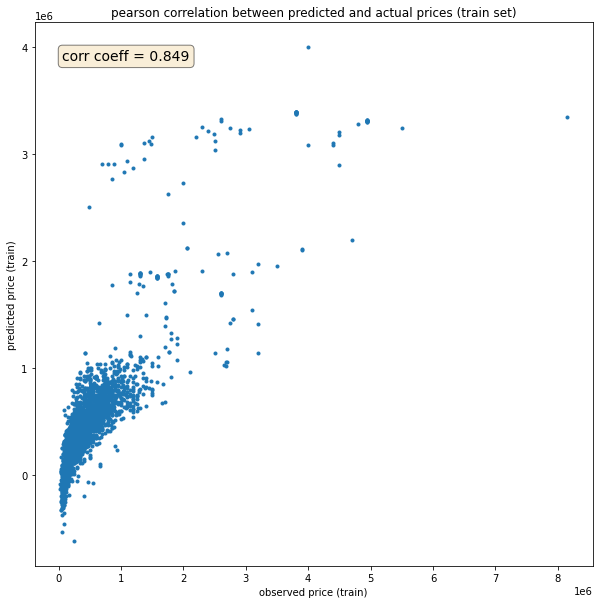

Pearson coefficient: correlation between true and predicted (train): 0.8487 
Regression accuracy (R^2) estimated via pearson coefficient (train): 0.7204 


In [16]:
pearson_correlation = pearsonr(Y_train ,ypred_train) # compute pearson coefficient
fig, ax = plot.subplots(figsize=(10,10))
plot.plot(Y_train ,ypred_train,'o',markersize=3)
plot.xlabel('observed price (train)')
plot.ylabel('predicted price (train)')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, 'corr coeff = {0:3.3f}'.format(pearson_correlation[0]), transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
plot.title('pearson correlation between predicted and actual prices (train set)')
plot.show()
print(f'Pearson coefficient: correlation between true and predicted (train): {pearson_correlation[0]:4.4f} ')
print(f'Regression accuracy (R^2) estimated via pearson coefficient (train): {pearson_correlation[0]**2:4.4f} ')

#"how well fitted" plot of our predicted y and actual y from test set

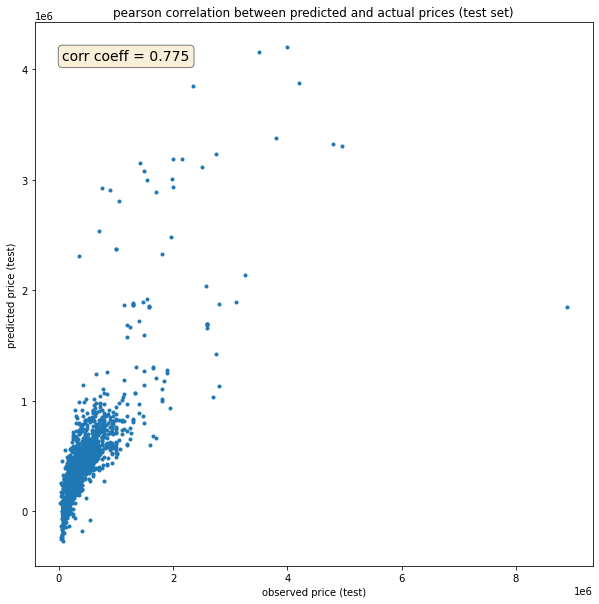

Pearson coefficient: correlation between true and predicted (test): 0.7746 
Regression accuracy (R^2) estimated via pearson coefficient (test): 0.6001 


In [17]:
#plot.scatter(Y_test, yprediction)
#plot.xlabel('real data'), plot.ylabel('predicted data')
#pearson_correlation = pearsonr(Y_test, yprediction)# compute pearson coefficient
#print(f'Accuracy score (R^2): {pearson_correlation[0]**2:2.2f}')
#plot.show()

pearson_correlation = pearsonr(Y_test, yprediction)# compute pearson coefficient
fig, ax = plot.subplots(figsize=(10,10))
plot.plot(Y_test ,yprediction,'o',markersize=3)
plot.xlabel('observed price (test)')
plot.ylabel('predicted price (test)')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, 'corr coeff = {0:3.3f}'.format(pearson_correlation[0]), transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
plot.title('pearson correlation between predicted and actual prices (test set)')

plot.show()
print(f'Pearson coefficient: correlation between true and predicted (test): {pearson_correlation[0]:4.4f} ')
print(f'Regression accuracy (R^2) estimated via pearson coefficient (test): {pearson_correlation[0]**2:4.4f} ')

Model evaluation using Pearson's coefficient between observed and predicted prices in the training dataset r_p  = 0.849. R^2 obtained through the Pearson estimator is similar to the score received using the model. Right – Model evaluation using Pearson's coefficient between observed and predicted prices in the training dataset r_p  = 0.775. R^2 obtained through the Pearson estimator is similar to the score received using the model. The fit ability of the model is of a medium 60% precision. 

# 2.7 take out possible unneccesary variables and redo process:

The initial model had all features inserted. However, based on the results thus far, features will be dropped from the model and the scores will be checked to complement our assumptions (of irrelevant features and overfit of the model). After realizing which variables are probably affecting our target variable, those only will be inserted into the model for better precision.  

In [19]:
data_a = pd.read_csv(r"C:\\Users\\zohar\\python_class\\CAR DETAILS.csv", index_col=0) #open and read csv file
data_a.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,#_owner_children
id,,,,,,,,,
1,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner,3
2,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner,0
3,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner,4
4,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner,5
5,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2


In [20]:
data_a.drop(columns=['#_owner_children'], inplace=True)
#data_a.drop(columns=['#_owner_children', 'owner', 'km_driven', 'seller_type'], inplace=True) <-- try different combinations and check scores. 

'\nTraining R^2 = 0.72/// km driving – 0.7157 not sig ols sig/ fuel 0.7018 not sure ols sig/ seller type 0.7158 not sig ols sig/ transmission – 9.704 not sure ols sig/ owner – 0.719 not sig ols sig/ owner children 0.72 not sig at all ols not sig / year??  ols sig'

In [21]:
dummydata_a=pd.get_dummies(data_a)

In [22]:
dummydata_a.head()

,year,selling_price,km_driven,brand_Ambassador,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,brand_Fiat,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
id,,,,,,,,,,,,,,,,,,,,,
1,2007,60000,70000,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
2,2007,135000,50000,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
3,2012,600000,100000,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
4,2017,250000,46000,0,0,0,0,0,1,0,...,0,1,0,0,1,1,0,0,0,0
5,2014,450000,141000,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [23]:
Y=dummydata_a['selling_price']
X=dummydata_a.drop(columns='selling_price')

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3038, 46)
(3038,)
(1302, 46)
(1302,)


In [26]:
regressor_a = LinearRegression() #a training model that implements linear regression
regressor_a.fit(X_train,Y_train) #passing the X_train that holds the brand and y_train that holds the selling price, and starting the train (creating the model)
print("Train Accuracy:",regressor_a.score(X_train, Y_train))
print("Test Accuracy:",regressor_a.score(X_test, Y_test))

Train Accuracy: 0.7202143026179655
Test Accuracy: 0.5780266351198673


Manually sub-setting the variables while logically dropping what seems to be unrelated to the price of a car gives us an insignificant change in R^2 only when we drop the number of children of the owner (R^2≅ 0.72) Further variables we drop based on our assumptions (mentioned in a comment in tab 20) decrease the R^2 more significantly. for example, dropping km driving, seller type and the owner as well as the children of the owner grants us an R^2  = 0.7085. Meaning our model becomes less accurately fitting, or underfitted, and we are missing crucial information which affects the selling price of cars, the variable we are trying to predict. 

In [27]:
X = sm.add_constant(X_train)
sm_model = sm.OLS(Y_train, X)
results = sm_model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     197.9
Date:                Thu, 10 Jun 2021   Prob (F-statistic):               0.00
Time:                        09:05:45   Log-Likelihood:                -42758.
No. Observations:                3038   AIC:                         8.560e+04
Df Residuals:                    2998   BIC:                         8.584e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Conducting regression using OLS we can check which features are of significance to the model looking at their p-value such as the feature is significant (meaning, significantly affects selling price the dependent variable) if p-value < 0.05. Looking at the table above we see that the only insignificant feature is the number of children of the owner ('#_owner_children). It also seems that Jaguar and Volvo are cars that are not significantly affecting the selling price of the car. 
This aligns with both our manual examination taking a subgroup of variables and seeing if R^2 changes as well as the correlation graphs in the beginning of this project.


# 2.8 Predict Over New Data

In [28]:
data_c = {'brand':  ['Honda', 'Hyundai', 'Mercedes-Benz'],
        'year': [2007, 2016, 2015],
          'km_driven': [40000, 6000, 9500] ,
          'fuel':['Petrol', 'Petrol','Diesel'] ,
          'seller_type': ['Dealer', 'Dealer','Dealer'],
          'transmission':['Automatic', 'Manual','Manual'],
          'owner': ['Second Owner', 'Third Owner', 'First Owner']
        }

df = pd.DataFrame(data_c, columns = ['brand','year','km_driven', 'fuel', 'seller_type', 'transmission', 'owner'])
df

,brand,year,km_driven,fuel,seller_type,transmission,owner
0,Honda,2007,40000,Petrol,Dealer,Automatic,Second Owner
1,Hyundai,2016,6000,Petrol,Dealer,Manual,Third Owner
2,Mercedes-Benz,2015,9500,Diesel,Dealer,Manual,First Owner


In [29]:
df = pd.get_dummies(df)
df

,year,km_driven,brand_Honda,brand_Hyundai,brand_Mercedes-Benz,fuel_Diesel,fuel_Petrol,seller_type_Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Second Owner,owner_Third Owner
0,2007,40000,1,0,0,0,1,1,1,0,0,1,0
1,2016,6000,0,1,0,0,1,1,0,1,0,0,1
2,2015,9500,0,0,1,1,0,1,0,1,1,0,0


In [30]:
# we need to create a dataframe of the same structure to our test/train feature df (X) in order to use the model. 
df['brand_Ambassador'] = [0,0,0]
df['brand_Audi'] = [0,0,0]
df['brand_BMW'] = [0,0,0]
df['brand_Chevrolet'] = [0,0,0]
df['brand_Daewoo'] = [0,0,0]
df['brand_Datsun'] = [0,0,0]
df['brand_Fiat'] = [0,0,0]
df['brand_Force'] = [0,0,0]
df['brand_Ford'] = [0,0,0]
df['brand_Isuzu'] = [0,0,0]
df['brand_Jaguar'] = [0,0,0]
df['brand_Jeep'] = [0,0,0]
df['brand_Kia'] = [0,0,0]
df['brand_Land'] = [0,0,0]
df['brand_MG'] = [0,0,0]
df['brand_Mahindra'] = [0,0,0]
df['brand_Maruti'] = [0,0,0]
df['brand_Mitsubishi'] = [0,0,0]
df['brand_Nissan'] = [0,0,0]
df['brand_OpelCorsa'] = [0,0,0]
df['brand_Renault'] = [0,0,0]
df['brand_Skoda'] = [0,0,0]
df['brand_Tata'] = [0,0,0]
df['brand_Toyota'] = [0,0,0]
df['brand_Volkswagen'] = [0,0,0]
df['brand_Volvo'] = [0,0,0]
df['fuel_CNG'] = [0,0,0]
df['fuel_Electric'] = [0,0,0]
df['fuel_LPG'] = [0,0,0]
df['seller_type_Individual'] = [0,0,0]
df['seller_type_Trustmark Dealer'] = [0,0,0]
df['owner_Fourth & Above Owner'] = [0,0,0]
df['owner_Test Drive Car'] = [0,0,0]
df = df[['year',
 'km_driven',
 'brand_Ambassador',
 'brand_Audi',
 'brand_BMW',
 'brand_Chevrolet',
 'brand_Daewoo',
 'brand_Datsun',
 'brand_Fiat',
 'brand_Force',
 'brand_Ford',
 'brand_Honda',
 'brand_Hyundai',
 'brand_Isuzu',
 'brand_Jaguar',
 'brand_Jeep',
 'brand_Kia',
 'brand_Land',
 'brand_MG',
 'brand_Mahindra',
 'brand_Maruti',
 'brand_Mercedes-Benz',
 'brand_Mitsubishi',
 'brand_Nissan',
 'brand_OpelCorsa',
 'brand_Renault',
 'brand_Skoda',
 'brand_Tata',
 'brand_Toyota',
 'brand_Volkswagen',
 'brand_Volvo',
 'fuel_CNG',
 'fuel_Diesel',
 'fuel_Electric',
 'fuel_LPG',
 'fuel_Petrol',
 'seller_type_Dealer',
 'seller_type_Individual',
 'seller_type_Trustmark Dealer',
 'transmission_Automatic',
 'transmission_Manual',
 'owner_First Owner',
 'owner_Fourth & Above Owner',
 'owner_Second Owner',
 'owner_Test Drive Car',
 'owner_Third Owner']]
df

,year,km_driven,brand_Ambassador,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,brand_Fiat,brand_Force,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,40000,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,2016,6000,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,2015,9500,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0


In [31]:
y_hat = regressor_a.predict(df)
print(f'Selling price prediction of Honda: {y_hat[0]}')
print(f'Selling price prediction of Hyundai: {y_hat[1]}') 
print(f'Selling price prediction of Mercedez-Benz: {y_hat[2]}')

Selling price prediction of Honda: 462132.3123910725
Selling price prediction of Hyundai: 457368.4119745046
Selling price prediction of Mercedez-Benz: 2970463.4831561297


# 3 Logistic Regression Model

Is a brand going to be sold above their own mode price or not? 

When constructing the logistic regression model the DV was transformed into a Boolean column that tells us whether a car will be sold at a price higher than its brand's most prevalent price (mode). 

In [11]:
data_log = pd.read_csv(r"C:\\Users\\zohar\\python_class\\CAR DETAILS.csv", index_col=0)
data_log.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,#_owner_children
id,,,,,,,,,
1,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner,3
2,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner,0
3,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner,4
4,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner,5
5,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2


# 3.1 find each brand's mode price

In [13]:
modedf = data_log.groupby('brand')['selling_price'].apply(pd.Series.mode)
modedf = modedf.reset_index(level=['brand']).drop_duplicates(subset='brand', keep='first')
modedf.rename(columns = {'selling_price': 'mode_price'}, inplace=True)
modedf

,brand,mode_price
0,Ambassador,120000
0,Audi,1580000
0,BMW,4950000
0,Chevrolet,130000
0,Daewoo,60000
0,Datsun,250000
0,Fiat,350000
0,Force,346000
0,Ford,650000
0,Honda,300000


In [14]:
data_log = pd.merge(data_log, modedf, on='brand')

In [15]:
data_log

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,#_owner_children,mode_price
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner,3,250000
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner,0,250000
2,Maruti,2007,140000,125000,Petrol,Individual,Manual,First Owner,5,250000
3,Maruti,2017,365000,78000,CNG,Individual,Manual,First Owner,5,250000
4,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner,5,250000
...,...,...,...,...,...,...,...,...,...,...
4335,Ambassador,2002,50000,120000,Diesel,Individual,Manual,Fourth & Above Owner,4,120000
4336,Ambassador,2012,430000,50000,Petrol,Individual,Manual,Second Owner,0,120000
4337,Ambassador,2005,120000,50000,Diesel,Individual,Manual,Second Owner,4,120000
4338,Ambassador,2005,120000,50000,Diesel,Individual,Manual,Second Owner,1,120000


# 3.2 Turn target variable into binary

In [16]:
data_log['price_above_mode'] = np.where(data_log['selling_price'] > data_log['mode_price'], True, False)

In [17]:
data_log

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,#_owner_children,mode_price,price_above_mode
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner,3,250000,False
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner,0,250000,False
2,Maruti,2007,140000,125000,Petrol,Individual,Manual,First Owner,5,250000,False
3,Maruti,2017,365000,78000,CNG,Individual,Manual,First Owner,5,250000,True
4,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner,5,250000,False
...,...,...,...,...,...,...,...,...,...,...,...
4335,Ambassador,2002,50000,120000,Diesel,Individual,Manual,Fourth & Above Owner,4,120000,False
4336,Ambassador,2012,430000,50000,Petrol,Individual,Manual,Second Owner,0,120000,True
4337,Ambassador,2005,120000,50000,Diesel,Individual,Manual,Second Owner,4,120000,False
4338,Ambassador,2005,120000,50000,Diesel,Individual,Manual,Second Owner,1,120000,False


In [18]:
dflog = data_log
dflog.drop(['selling_price', '#_owner_children', 'mode_price'], axis=1, inplace=True)

In [19]:
dflog

,brand,year,km_driven,fuel,seller_type,transmission,owner,price_above_mode
0,Maruti,2007,70000,Petrol,Individual,Manual,First Owner,False
1,Maruti,2007,50000,Petrol,Individual,Manual,First Owner,False
2,Maruti,2007,125000,Petrol,Individual,Manual,First Owner,False
3,Maruti,2017,78000,CNG,Individual,Manual,First Owner,True
4,Maruti,2007,70000,Petrol,Individual,Manual,First Owner,False
...,...,...,...,...,...,...,...,...
4335,Ambassador,2002,120000,Diesel,Individual,Manual,Fourth & Above Owner,False
4336,Ambassador,2012,50000,Petrol,Individual,Manual,Second Owner,True
4337,Ambassador,2005,50000,Diesel,Individual,Manual,Second Owner,False
4338,Ambassador,2005,50000,Diesel,Individual,Manual,Second Owner,False


Counts of instances with selling prices above the brand's mode for different brands. Visualizing the binary change of the format:

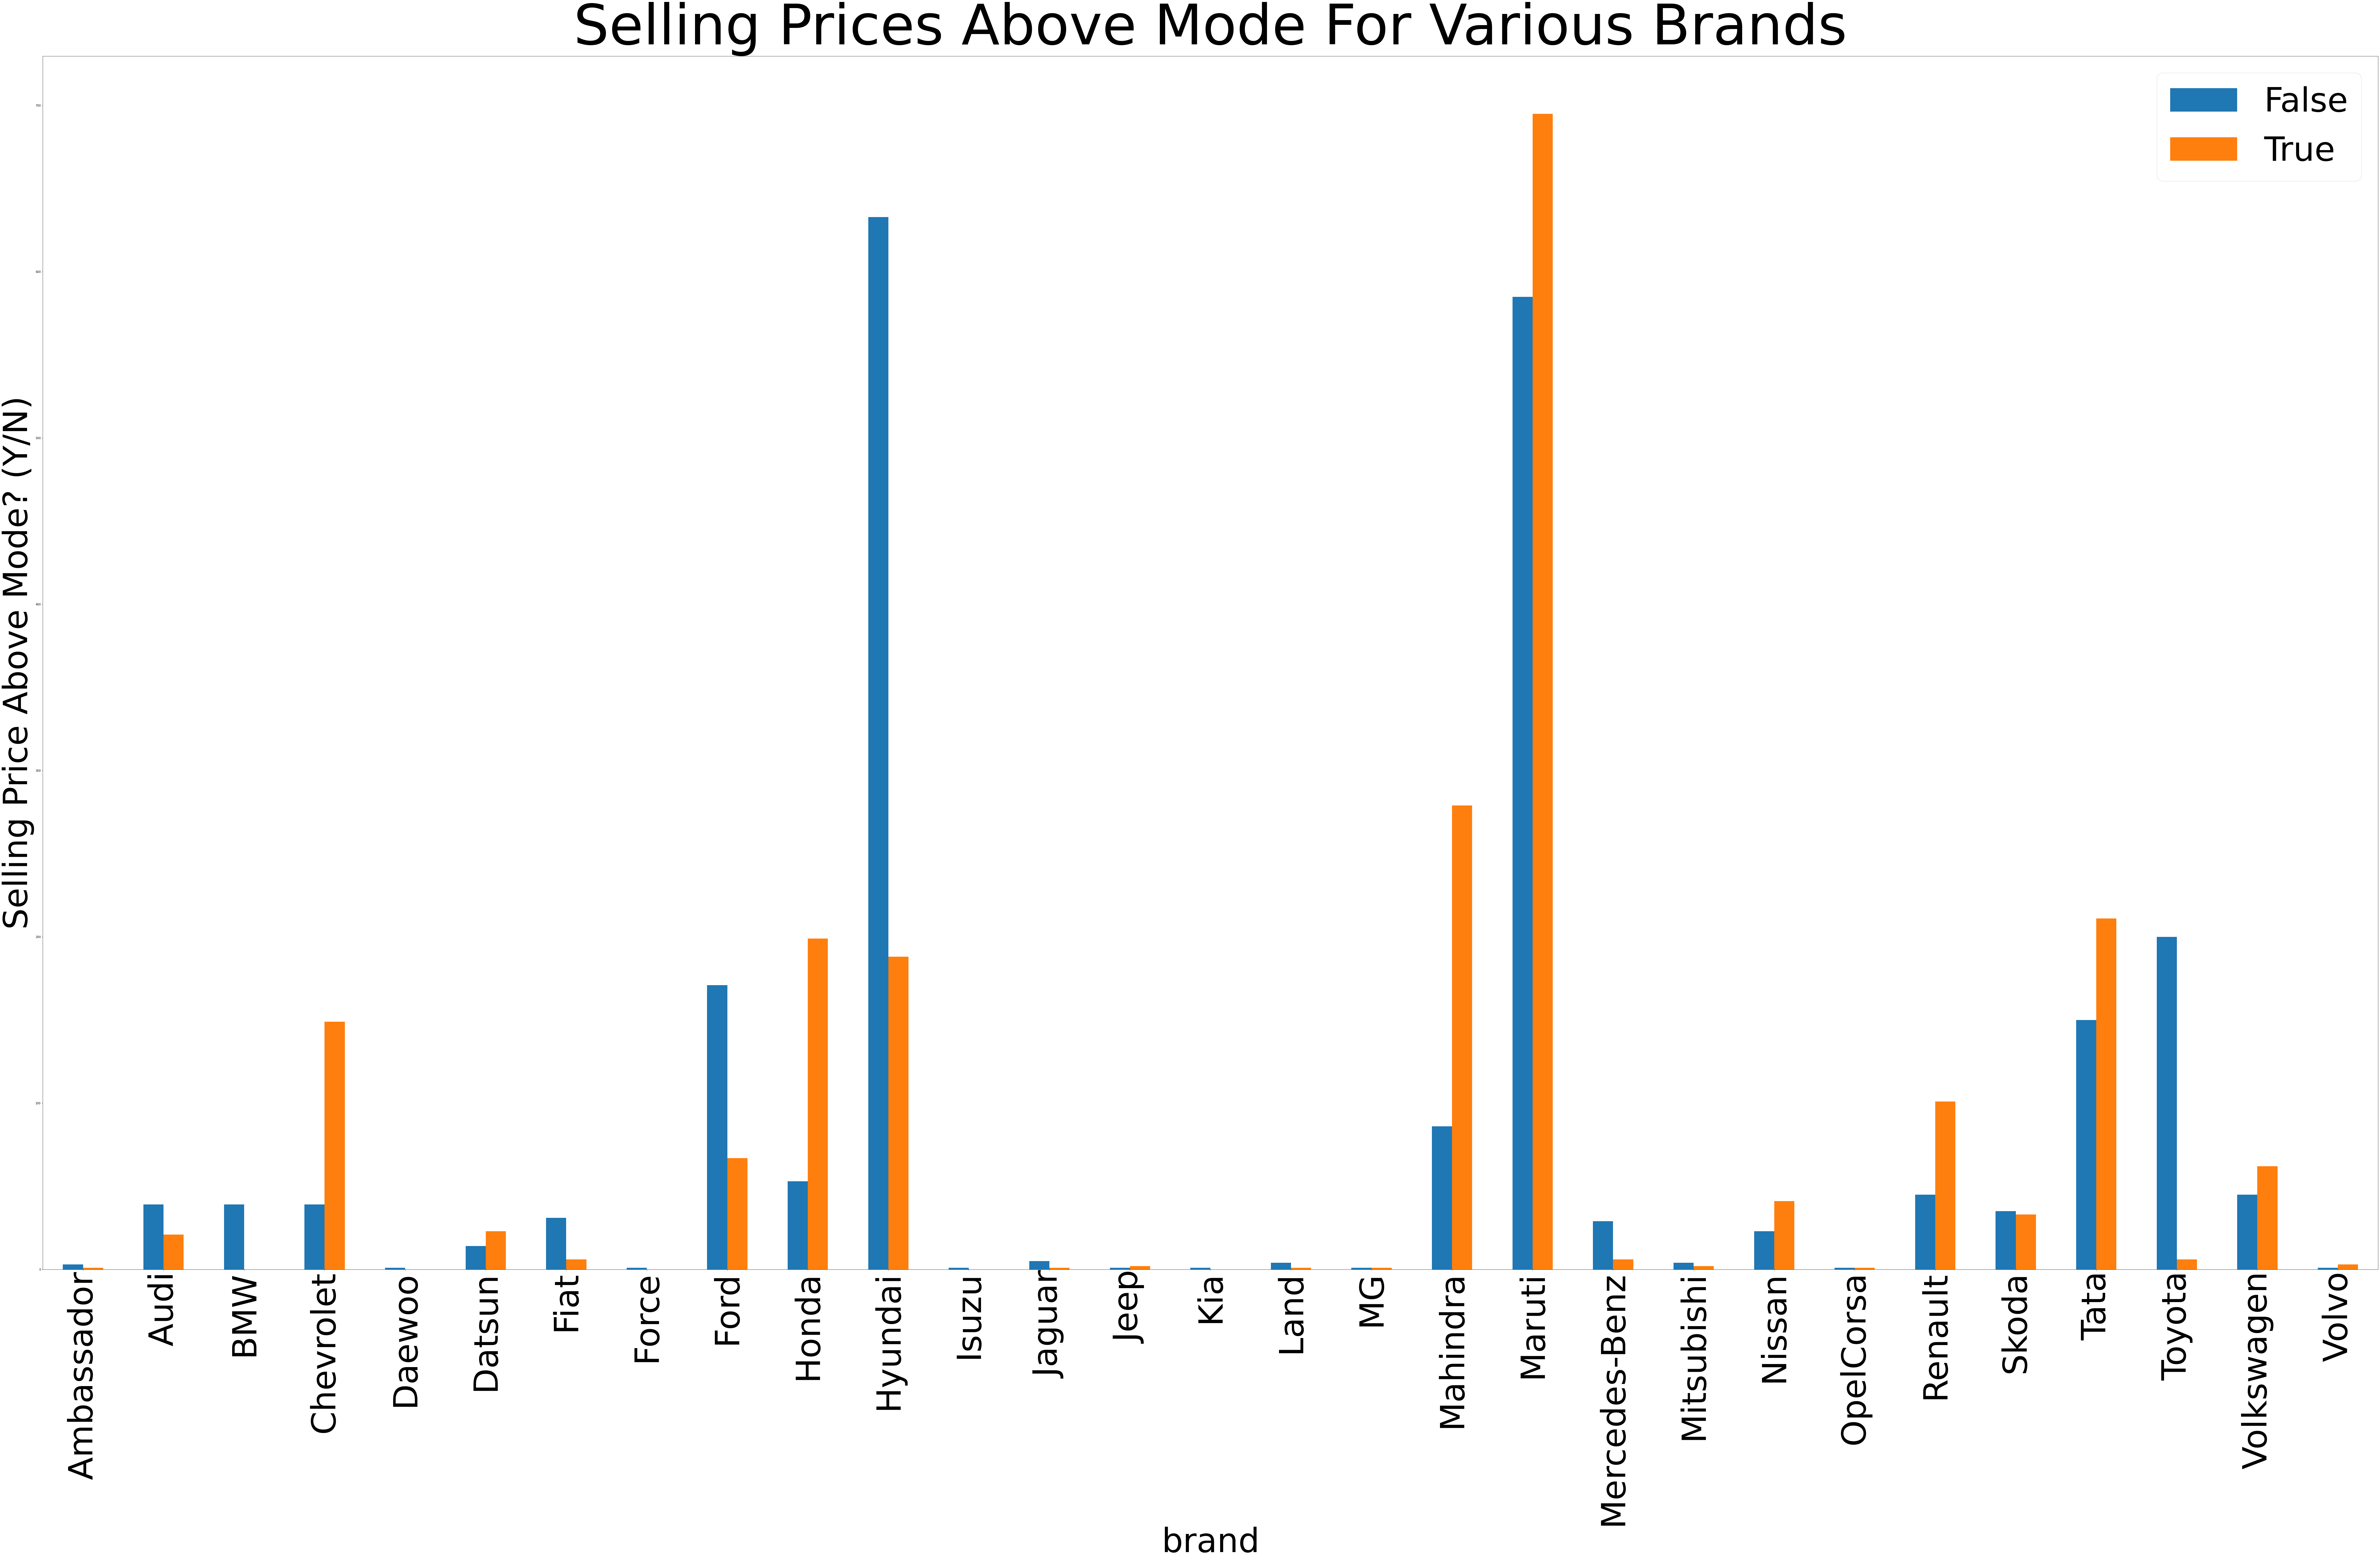

In [103]:
%matplotlib inline
pd.crosstab(dflog['brand'], dflog['price_above_mode']).plot(kind='bar', figsize=(150,80))
plot.title('Selling Prices Above Mode For Various Brands', fontsize = 200)
plot.xticks(fontsize=120, rotation = 90)
plot.ylabel('Selling Price Above Mode? (Y/N)', fontsize=120)
plot.xlabel('brand', fontsize=120)
plot.legend(prop={'size': 120})
plot.savefig('Logit Reg Above Mode')

The figure above shows how the prices distribute in each brand over the brand's mode.

# 3.3 turn categorical variables into dummies

In [20]:
dl=pd.get_dummies(dflog)
dl

,year,km_driven,price_above_mode,brand_Ambassador,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,brand_Fiat,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,70000,False,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
1,2007,50000,False,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
2,2007,125000,False,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
3,2017,78000,True,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
4,2007,70000,False,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2002,120000,False,1,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
4336,2012,50000,True,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4337,2005,50000,False,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4338,2005,50000,False,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


# 3.4 Creating X and Y

In [22]:
y = dl['price_above_mode']
x = dl.drop(columns = ['price_above_mode'])

# 3.5 Split into Test and Train Samples

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# 3.6 Train the model

In [24]:
lr = LogisticRegression(solver='lbfgs', max_iter=10000)
model=lr.fit(x_train,y_train)
print('Training Regression finished with Accuracy={0:f}'.format(lr.score(x_train,y_train)))

Training Regression finished with Accuracy=0.598420


# 3.7 Predict Over Test Set

In [25]:
predictions=model.predict(x_test)
print('Testing Regression finished with Accuracy={0:f}'.format(lr.score(x_test,y_test)))

Testing Regression finished with Accuracy=0.593702


The logistic regression model uses the Accuracy measure to score the predictiveness of a model. Accuracy  = 0.593 (59%) for the test set and 0.598 for the training set. 
This model is less overfitted implied by the approximation of the train and test accuracy scores. 
In comparison to the linear regression test score (R^2  = 57.8%), turning the price prediction to a Boolean prediction of whether the car will be sold over the brand's mode increased prediction abilities and accuracy (59%).  

# 3.8 Predict Over New Data

In [172]:
y_hat = model.predict(df)
print(f'Selling price prediction of Honda: {y_hat[0]}')
print(f'Selling price prediction of Hyundai: {y_hat[1]}') 
print(f'Selling price prediction of Mercedez-Benz: {y_hat[2]}')

Selling price prediction of Honda: True
Selling price prediction of Hyundai: True
Selling price prediction of Mercedez-Benz: True


# 3.9 Evaluate This Classification Model

Accuracy: 0.5937019969278033
Precision score: 0.580
Recall score: 0.586
F1 score: 0.583
AUC score: 0.593


Text(0.5, 1.0, 'Confusion Matrix')

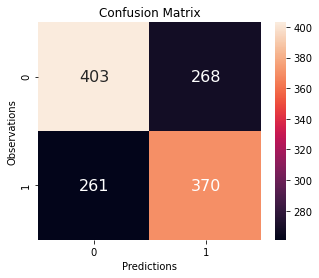

In [115]:
cm=confusion_matrix(y_test,predictions)
pre=precision_score(y_test,predictions)
rec=recall_score(y_test,predictions)
f1=f1_score(y_test,predictions)
auc=roc_auc_score(y_test,predictions)
print("Accuracy:", accuracy_score(y_test, predictions))
print(f'Precision score: {pre:3.3f}')
print(f'Recall score: {rec:3.3f}')
print(f'F1 score: {f1:3.3f}')
print(f'AUC score: {auc:3.3f}')

plot.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt="d",annot_kws={"size": 16})# font size
plot.xlabel('Predictions')
plot.ylabel('Observations')
plot.title('Confusion Matrix')

•	268 observations of False Positive (model said  price will be above the brand's mode, but it wasn't). 
•	261 observations of False Negative (model said price will be below the brand's mode, but it was above).

In [82]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.61      0.60      0.60       671
        True       0.58      0.59      0.58       631

    accuracy                           0.59      1302
   macro avg       0.59      0.59      0.59      1302
weighted avg       0.59      0.59      0.59      1302



Our logistic model has a precision score of 58%, meaning 58% of the time we predict the price to be above the brand's mode price, we are correct, and it is. The model has a recall score of 58.6%, meaning it is able to predict 58.6% of all incidents of cars that are sold above their brand's mode price. Support shows us of 671 false prediction cases versus 631 true predictions, which isn't impressing. 

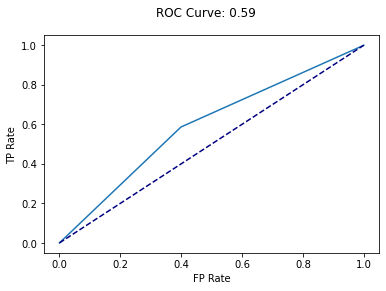

In [117]:
roc = roc_curve(y_test,predictions)
fpr, tpr, thresholds = roc
plot.plot(fpr,tpr)
plot.plot([0, 1], [0, 1], color='navy', linestyle='--')
plot.suptitle(f'ROC Curve: {auc:2.2f}')
plot.xlabel('FP Rate')
plot.ylabel('TP Rate')
plot.show()

Receiver Operator Characteristic [ROC] is a plot that takes the true positive rate (how good the model is at predicting the positive class when outcome is actually positive) and the false positive rate (how often a positive class is actually negative), and shows the trade-off between sensitivity (TP/(TP+FN)) and specificity (FP/(FP+TN)). We get a neutral line between the rates showing indifference. A model that cannot predict (with ROC = 50%) will align along the neutral line, so, the test is less accurate as the curve approximates the ROC diagonal line, and an AUC score of 1 represents a perfect classifier. Our AUC score is 59.3%, meaning our model isn't very predictive. 

# 4 A Decision Tree Classification Model

The decision tree classification model ultimately divides data into groups of homogenous target values. This way running an incident through the tree with true/false questions lead that incidence through a path at the end of which the dependent variable will be predicted. In our example, an incident will go through a path at the end of which we'll predict whether or not the incident's (a car) selling price will be above the car's brand's mode price. An internal node represents the feature, the branch – a decision (yes/no), and the leaf node – the outcome, the classification itself. 

# 4.1 Create X and Y

In [26]:
y = dl['price_above_mode']
x = dl.drop(columns = ['price_above_mode'])

# 4.2 Split into Train and Test Samples

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# 4.3 Train the Model

In [28]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
clf = clf.fit(x_train,y_train)
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [29]:
y_predictor = clf.predict(x_train)
acc_score = accuracy_score(y_train, y_predictor) #automatic calculation of accuracy
print('Accuracy Score (test): {0:f}'.format(acc_score))

Accuracy Score (test): 0.771889


# 4.4 Predict Over Test Sample

In [30]:
y_predict =clf.predict(x_test) 
fraction_of_correct_predictions = sum(y_test==y_predict)/len(y_test) #manual calculation of accuracy
print('fraction of correct predictions: {0:6.6f}'.format(fraction_of_correct_predictions))
#22% error
print("Accuracy:", accuracy_score(y_test, y_predict))

fraction of correct predictions: 0.797235
Accuracy: 0.7972350230414746


In [31]:
y_predict =clf.predict(x_test) 
acc_score = accuracy_score(y_test, y_predict) #automatic calculation of accuracy
print('Accuracy Score (test): {0:f}'.format(acc_score))

Accuracy Score (test): 0.797235


The accuracy score for the test set is 0.797. Compared to the logistic and linear model, that's a far better accuracy.  Moreover, compared to the model's train set accuracy score of 0.77, this model is quite of a good fit as the gap is small.

In [160]:
# a sample prediction example
sample_index = 14
sample_attributes = x_train.iloc[sample_index, :]
print('Prediction for sample #{0:d} ({1})'.format(sample_index+1,sample_attributes))
print(f'\tPredicted: {clf.predict([sample_attributes])}. Expected: {y_test.iloc[sample_index]}')
print('\tPredicted probabilities:{0}'.format(clf.predict_proba([sample_attributes])))
print('\nOverall prediction score:{0:f}'.format(clf.score(X=x_test,y=y_test)))

Prediction for sample #15 (year                              2013
km_driven                       100000
brand_Ambassador                     0
brand_Audi                           0
brand_BMW                            0
brand_Chevrolet                      0
brand_Daewoo                         0
brand_Datsun                         0
brand_Fiat                           0
brand_Force                          0
brand_Ford                           0
brand_Honda                          0
brand_Hyundai                        0
brand_Isuzu                          0
brand_Jaguar                         0
brand_Jeep                           0
brand_Kia                            0
brand_Land                           0
brand_MG                             0
brand_Mahindra                       1
brand_Maruti                         0
brand_Mercedes-Benz                  0
brand_Mitsubishi                     0
brand_Nissan                         0
brand_OpelCorsa                      

# 4.5 Draw The Tree

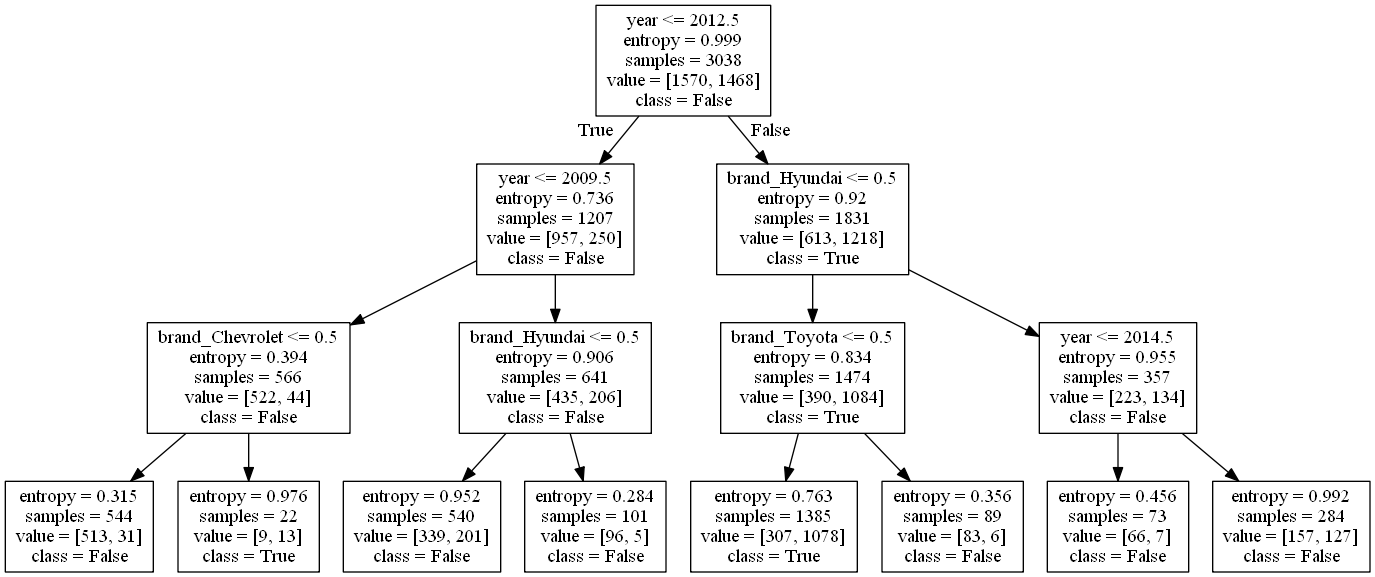

In [159]:
features = ['year', 'km_driven', 'brand_Ambassador', 'brand_Audi', 'brand_BMW',
       'brand_Chevrolet', 'brand_Daewoo', 'brand_Datsun', 'brand_Fiat',
       'brand_Force', 'brand_Ford', 'brand_Honda', 'brand_Hyundai',
       'brand_Isuzu', 'brand_Jaguar', 'brand_Jeep', 'brand_Kia', 'brand_Land',
       'brand_MG', 'brand_Mahindra', 'brand_Maruti', 'brand_Mercedes-Benz',
       'brand_Mitsubishi', 'brand_Nissan', 'brand_OpelCorsa', 'brand_Renault',
       'brand_Skoda', 'brand_Tata', 'brand_Toyota', 'brand_Volkswagen',
       'brand_Volvo', 'fuel_CNG', 'fuel_Diesel', 'fuel_Electric', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner']
dot_data = tree.export_graphviz(clf, out_file=None, feature_names = features, class_names=['False', 'True'])  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

Say we take a car and run it through the model, we first check whether its production year is 2012 or earlier? If not – is it not a Hyundai? If production year is 2012 or earlier, is is now earlier than 2009? and so on. In other words, climbing down the tree, the incident is checked for features-based positions at a Boolean questioning format, until reaching the last node where we are told whether or not that incident will be sold above the brand's mode price, based on where she fits in the feature-based subgroups the model has created. 

# 4.6 Evaluate This Classification Model

Accuracy: 0.7972350230414746
Precision score: 0.806
Recall score: 0.765
F1 score: 0.785
AUC score: 0.796


Text(0.5, 1.0, 'Confusion Matrix')

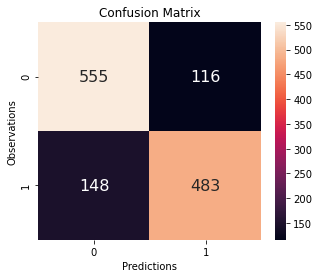

In [168]:
cm=confusion_matrix(y_test,y_predict)
pre=precision_score(y_test,y_predict)
rec=recall_score(y_test,y_predict)
f1=f1_score(y_test,y_predict)
auc=roc_auc_score(y_test,y_predict)
print("Accuracy:", accuracy_score(y_test, y_predict))
print(f'Precision score: {pre:3.3f}')
print(f'Recall score: {rec:3.3f}')
print(f'F1 score: {f1:3.3f}')
print(f'AUC score: {auc:3.3f}')

plot.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt="d",annot_kws={"size": 16})# font size
plot.xlabel('Predictions')
plot.ylabel('Observations')
plot.title('Confusion Matrix')

• 116 observations of False Positive (model said  price will be above the brand's mode, but it wasn't). 
• 148 observations of False Negative (model said price will be below the brand's mode, but it was above)


In [169]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

       False       0.79      0.83      0.81       671
        True       0.81      0.77      0.79       631

    accuracy                           0.80      1302
   macro avg       0.80      0.80      0.80      1302
weighted avg       0.80      0.80      0.80      1302



Our model has a precision score of 81%, meaning 81% of the time we predict the price to be above the brand's mode price, we are correct. The model has a recall score of 77%, meaning it is able to predict 77% of all incidents of cars that are sold above their brand's mode price.  Support shows us of 671 false prediction cases versus 631 true predictions, again.  

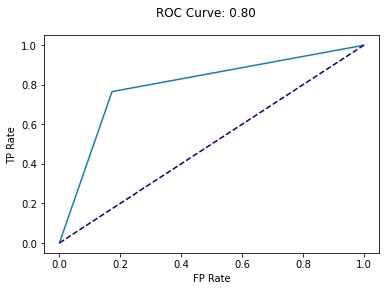

In [170]:
roc = roc_curve(y_test,y_predict)
fpr, tpr, thresholds = roc
plot.plot(fpr,tpr)
plot.plot([0, 1], [0, 1], color='navy', linestyle='--')
plot.suptitle(f'ROC Curve: {auc:2.2f}')
plot.xlabel('FP Rate')
plot.ylabel('TP Rate')
plot.show()

Our AUC score is 80%, meaning our model is quite predictive. This is a great improvement compared to the logistic model. 

# Decision Tree Vs. Logistic Regression For This Dataset:

As mentioned before, both recall and precision of the decision tree model scored higher meaning that at conducting a tree decision model for predictive purposes serves best at obtaining a solution for varying business purposes. The accuracy score of 79.7% compared to the linear model's R^2 of 57.8% and the logistic model of 59%, comes to suggest that the structure of the correlation is not linear, but a more complex relationship between our features and y, and that for that case, modeling according to a decision tree method yields the most accurate results. 
The problem with a logistic regression is that it can be easily overfitted and can't deal with a lot of categorical variables (such as those we have here). This might be an explanation to why our model isn't great. The decision tree model can be problematic as well. It is prone to overfitting, be-it because of the model assigns meaning to meaningless noise or because of a tree depth too large, in comparison to logistic regression where each feature is associated only with one beta. Decision trees predict well, they're easily interpretable. For this data specifically, model evaluation methods show the best predictive model is the decision tree. 

# 4.7 Predict Over New Data

In [171]:
y_hat = clf.predict(df)
print(f'Selling price prediction of Honda: {y_hat[0]}')
print(f'Selling price prediction of Hyundai: {y_hat[1]}') 
print(f'Selling price prediction of Mercedez-Benz: {y_hat[2]}')

Selling price prediction of Honda: False
Selling price prediction of Hyundai: False
Selling price prediction of Mercedez-Benz: True


# 5 - Repeat (3) and (4) with 5-cross val:

Cross-validation is when we run our experiments five times, slicing a different segment each time and training the model five times as well, instead of once like we do in our train/test split method. This method is supposed to indicate better how the model is over data it doesn't recognize. 

In [173]:
dl

,year,km_driven,price_above_mode,brand_Ambassador,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,brand_Fiat,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,70000,False,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
1,2007,50000,False,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
2,2007,125000,False,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
3,2017,78000,True,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
4,2007,70000,False,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2002,120000,False,1,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
4336,2012,50000,True,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4337,2005,50000,False,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4338,2005,50000,False,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [32]:
y = dl['price_above_mode']
x = dl.drop(columns = ['price_above_mode'])

lr = LogisticRegression(solver='lbfgs', max_iter=10000)
model=lr.fit(x, y)

scores = cross_val_score(model, x, y, cv=5)
print("Accuracy: %0.2f (std: +/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.60 (std: +/- 0.09)


A 5 folds cross validation granted us a mean accuracy score of 60% for the logistic model, approximately the same results compared to train-test experiment, meaning the evaluations we obtained at our test/train method was not the consequence of getting a 'good testing set' by chance. 

In [33]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
clf = clf.fit(x,y)
scores = cross_val_score(clf, x, y, cv=5)
print("Accuracy: %0.2f (std: +/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.73 (std: +/- 0.15)


A 5 folds cross validation granted us a mean accuracy score of 71% accuracy for the decision tree model, which are less accurate in comparison to our train-test experiment. This may mean the results we received for the train-test experiments are biased to a good split of data. 

Let's Evaluate the Models again:

In [34]:
predictions=model.predict(x_test)

cm=confusion_matrix(y_test,predictions)
pre=precision_score(y_test,predictions)
rec=recall_score(y_test,predictions)
f1=f1_score(y_test,predictions)
auc=roc_auc_score(y_test,predictions)
print("Accuracy:", accuracy_score(y_test, predictions))
print(f'Precision score: {pre:3.3f}')
print(f'Recall score: {rec:3.3f}')

Accuracy: 0.5944700460829493
Precision score: 0.581
Recall score: 0.588


In [181]:
y_predict = clf.predict(x_test) 

cm=confusion_matrix(y_test,y_predict)
pre=precision_score(y_test,y_predict)
rec=recall_score(y_test,y_predict)
f1=f1_score(y_test,y_predict)
auc=roc_auc_score(y_test,y_predict)
print("Accuracy:", accuracy_score(y_test, y_predict))
print(f'Precision score: {pre:3.3f}')
print(f'Recall score: {rec:3.3f}')

Accuracy: 0.7987711213517665
Precision score: 0.811
Recall score: 0.762


For the logistic model, precision scored 0.581, Recall scored 0.588, again, the same as scores obtained by the train-test method. For the decision tree model, precision scored 0.911 and recall scored 0.762. Precision score increased using cross-validation, meaning our assumption of bias of chance strengthens. 

# 6 Decision Tree With Target Variable is at Which Quantile a Car's Selling Price Stands at Out ot the Brand's Quantiles:

In [35]:
df3 = pd.read_csv(r"C:\\Users\\zohar\\python_class\\CAR DETAILS.csv", index_col=0)
df3.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,#_owner_children
id,,,,,,,,,
1,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner,3
2,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner,0
3,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner,4
4,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner,5
5,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2


# 6.1 Get Quantiles

In [36]:
def getQuantile(row, brandsDict):
    if row.selling_price<brandDict[row.brand].iloc[0]:
        return 'Q1'
    elif row.selling_price<brandDict[row.brand].iloc[1]:
        return 'Q2'
    elif row.selling_price<brandDict[row.brand].iloc[2]:
        return 'Q3'
    else:
        return 'Q4'

In [37]:
brandDict={}
quant_sellingPrice=[]
for i, idf in df3.groupby('brand'):
    brandDict[i]  = idf.selling_price.quantile([0, .25, .5, .75, 1])
brandDict

{'Ambassador': 0.00     50000.0
 0.25    102500.0
 0.50    120000.0
 0.75    197500.0
 1.00    430000.0
 Name: selling_price, dtype: float64,
 'Audi': 0.00     650000.0
 0.25    1300000.0
 0.50    1580000.0
 0.75    1850000.0
 1.00    8900000.0
 Name: selling_price, dtype: float64,
 'BMW': 0.00     480000.0
 0.25    1520000.0
 0.50    2600000.0
 0.75    4950000.0
 1.00    4950000.0
 Name: selling_price, dtype: float64,
 'Chevrolet': 0.00      50000.0
 0.25     150000.0
 0.50     200000.0
 0.75     290000.0
 1.00    1000000.0
 Name: selling_price, dtype: float64,
 'Daewoo': 0.00    60000.0
 0.25    60000.0
 0.50    60000.0
 0.75    60000.0
 1.00    60000.0
 Name: selling_price, dtype: float64,
 'Datsun': 0.00    200000.0
 0.25    250000.0
 0.50    290000.0
 0.75    350000.0
 1.00    450000.0
 Name: selling_price, dtype: float64,
 'Fiat': 0.00     55000.0
 0.25    170000.0
 0.50    250000.0
 0.75    350000.0
 1.00    890000.0
 Name: selling_price, dtype: float64,
 'Force': 0.00    346000

In [38]:
df3['Quant_selling_price']=df3.apply(getQuantile, args=([brandDict]), axis=1)
print(df3['Quant_selling_price'])

id
1       Q2
2       Q2
3       Q4
4       Q3
5       Q3
        ..
4336    Q4
4337    Q4
4338    Q2
4339    Q4
4340    Q2
Name: Quant_selling_price, Length: 4340, dtype: object


# 6.2 Change Target Variable

In [39]:
df3

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,#_owner_children,Quant_selling_price
id,,,,,,,,,,
1,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner,3,Q2
2,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner,0,Q2
3,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner,4,Q4
4,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner,5,Q3
5,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2,Q3
...,...,...,...,...,...,...,...,...,...,...
4336,Hyundai,2014,409999,80000,Diesel,Individual,Manual,Second Owner,0,Q4
4337,Hyundai,2014,409999,80000,Diesel,Individual,Manual,Second Owner,2,Q4
4338,Maruti,2009,110000,83000,Petrol,Individual,Manual,Second Owner,5,Q2


In [40]:
df3.drop(['selling_price', '#_owner_children'], axis=1, inplace=True)
df3

,brand,year,km_driven,fuel,seller_type,transmission,owner,Quant_selling_price
id,,,,,,,,
1,Maruti,2007,70000,Petrol,Individual,Manual,First Owner,Q2
2,Maruti,2007,50000,Petrol,Individual,Manual,First Owner,Q2
3,Hyundai,2012,100000,Diesel,Individual,Manual,First Owner,Q4
4,Datsun,2017,46000,Petrol,Individual,Manual,First Owner,Q3
5,Honda,2014,141000,Diesel,Individual,Manual,Second Owner,Q3
...,...,...,...,...,...,...,...,...
4336,Hyundai,2014,80000,Diesel,Individual,Manual,Second Owner,Q4
4337,Hyundai,2014,80000,Diesel,Individual,Manual,Second Owner,Q4
4338,Maruti,2009,83000,Petrol,Individual,Manual,Second Owner,Q2


# 6.3 Create X and Y, and Turn Categorical Variables Into Dummies

In [41]:
y = df3['Quant_selling_price']
x = df3.drop(columns = ['Quant_selling_price'])
x=pd.get_dummies(x)
x

,year,km_driven,brand_Ambassador,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,brand_Fiat,brand_Force,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
id,,,,,,,,,,,,,,,,,,,,,
1,2007,70000,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
2,2007,50000,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
3,2012,100000,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
4,2017,46000,0,0,0,0,0,1,0,0,...,0,1,0,0,1,1,0,0,0,0
5,2014,141000,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4336,2014,80000,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4337,2014,80000,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4338,2009,83000,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [42]:
y

id
1       Q2
2       Q2
3       Q4
4       Q3
5       Q3
        ..
4336    Q4
4337    Q4
4338    Q2
4339    Q4
4340    Q2
Name: Quant_selling_price, Length: 4340, dtype: object

# 6.4 Split Into Train and Test Samples

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=17)

# 6.5 Train the Model

In [44]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(x_train, y_train)

# 6.6 Predict Over Test Sample

In [50]:
y_predict =clf.predict(x_test) 
acc_score = accuracy_score(y_test, y_predict) #automatic calculation of accuracy
print('Accuracy Score (test): {0:f}'.format(acc_score))

cm=confusion_matrix(y_test,y_predict)
pre=precision_score(y_test,y_predict, average='weighted')
rec=recall_score(y_test,y_predict, average='weighted')
f1=f1_score(y_test,y_predict, average='weighted')
print("Accuracy:", accuracy_score(y_test, y_predict))
print(f'Precision score: {pre:3.3f}')
print(f'Recall score: {rec:3.3f}')

Accuracy Score (test): 0.700461
Accuracy: 0.7004608294930875
Precision score: 0.672
Recall score: 0.700


Accuracy Score (test) with Gini criterion: 0.700 ; Accuracy Score (test) with entropy criterion: 0.679.
This model predicts in which quantile of the car's brand's prices a car will be sold. Accuracy score is lower than our other decision tree, which makes sense as we divide our target variable into more options and increase the change of making a mistake in our prediction. 

# 6.7 Draw Decision Tree

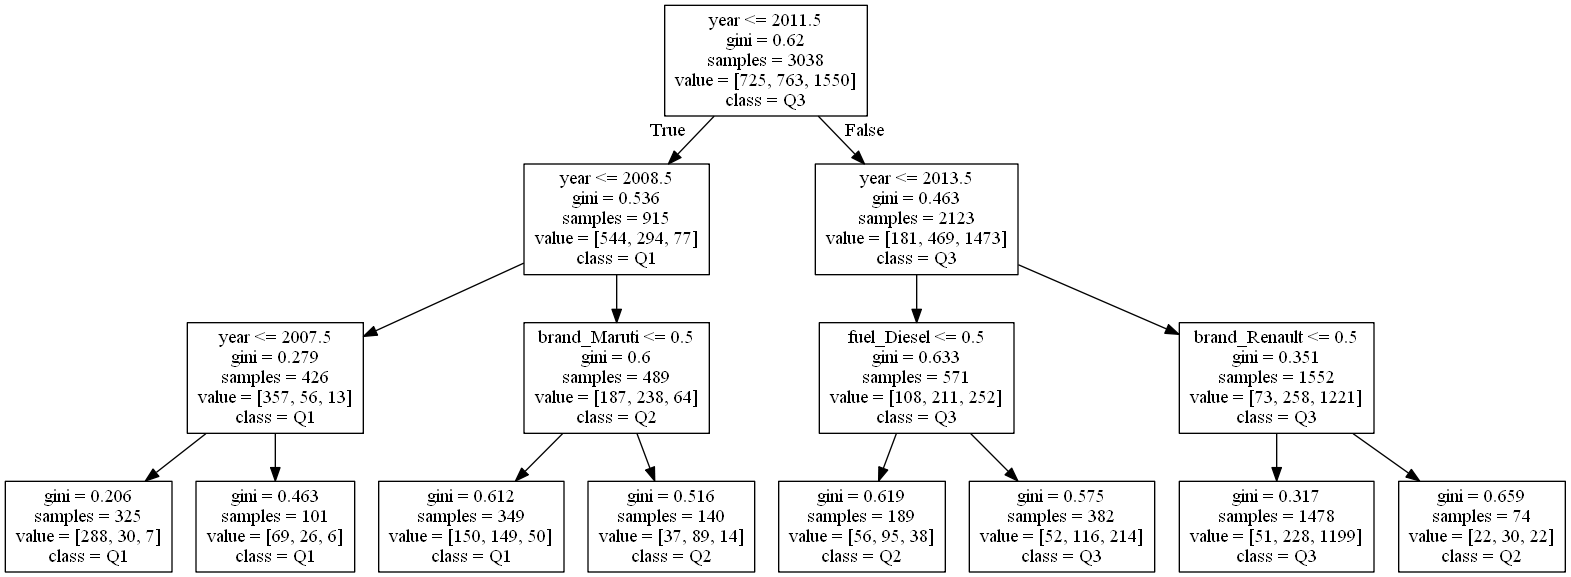

In [212]:
dot_data = tree.export_graphviz(clf, out_file=None,  feature_names=features, class_names=['Q1', 'Q2', 'Q3', 'Q4'])  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

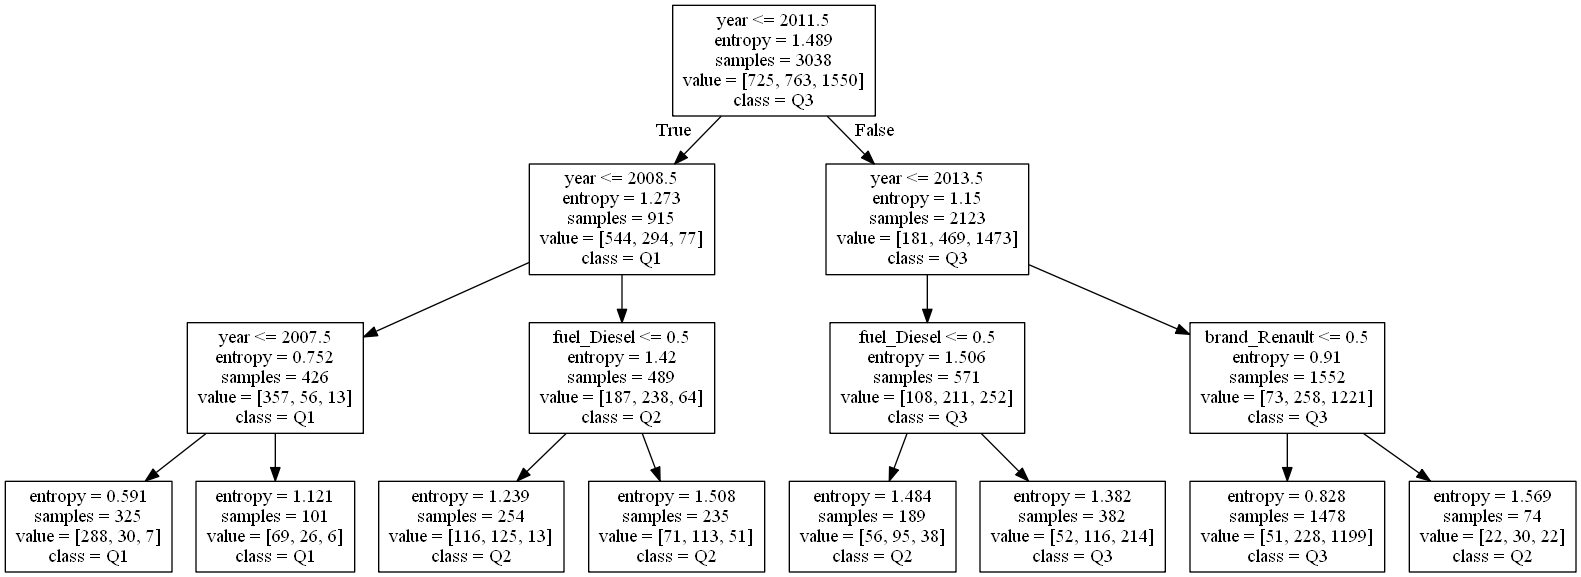

In [209]:
features = ['year', 'km_driven', 'brand_Ambassador', 'brand_Audi', 'brand_BMW',
       'brand_Chevrolet', 'brand_Daewoo', 'brand_Datsun', 'brand_Fiat',
       'brand_Force', 'brand_Ford', 'brand_Honda', 'brand_Hyundai',
       'brand_Isuzu', 'brand_Jaguar', 'brand_Jeep', 'brand_Kia', 'brand_Land',
       'brand_MG', 'brand_Mahindra', 'brand_Maruti', 'brand_Mercedes-Benz',
       'brand_Mitsubishi', 'brand_Nissan', 'brand_OpelCorsa', 'brand_Renault',
       'brand_Skoda', 'brand_Tata', 'brand_Toyota', 'brand_Volkswagen',
       'brand_Volvo', 'fuel_CNG', 'fuel_Diesel', 'fuel_Electric', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner']
dot_data = tree.export_graphviz(clf, out_file=None, feature_names = features, class_names=['Q1', 'Q2', 'Q3', 'Q4'])  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

In [213]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
0,year,0.905
25,brand_Renault,0.044
32,fuel_Diesel,0.039
20,brand_Maruti,0.012
44,owner_Test Drive Car,0.000
33,fuel_Electric,0.000
26,brand_Skoda,0.000
27,brand_Tata,0.000
28,brand_Toyota,0.000
29,brand_Volkswagen,0.000


# 6.8 Evaluate the Model

In [216]:
creport = classification_report(y_test, y_predict)
print(creport)

              precision    recall  f1-score   support

          Q2       0.69      0.76      0.72       321
          Q3       0.51      0.24      0.33       316
          Q4       0.74      0.89      0.81       665

    accuracy                           0.70      1302
   macro avg       0.65      0.63      0.62      1302
weighted avg       0.67      0.70      0.67      1302



'\nמתוך כל הפעמים שאמרתי פולס בפרסיזן 82 אחוז היו באמת לא נכונים. \nריקול המודל שלי הצליח לזהות 75% מתוך כל הלא נכונים. \nאם אני רוצה לקנות מכונית ולהשתמש במודל, אני רוצה פרסיזן לדעת כמה המכונית תעלה לי? ?\n'

precision scores of 74% of predictions of price being at 4th quantile being correct, 51% of predictions of price being at the 3rd quantile being correct, and 69% predictions of price being at the 2nd quantile being correct. The model's recall scores mean that it is able to predict 89% of all incidents of cars that are sold above their brand's 4th quantile price, and so on for the other quantiles. 

Text(0.5, 1.0, 'Confusion Matrix')

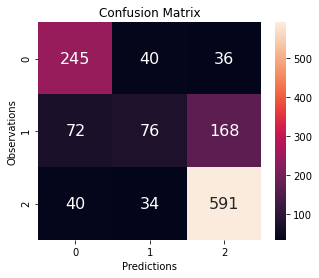

In [226]:
cm=confusion_matrix(y_test,y_predict)

plot.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt="d",annot_kws={"size": 16})# font size
plot.xlabel('Predictions')
plot.ylabel('Observations')
plot.title('Confusion Matrix')

•	345 observations that were predicted to be priced at a Q1 price were actually priced in Q1 equivalent price, 76 observations were predicted correctly to be sold at Q2 and 591 observations at Q3. 

# 6.9 Predict Over New Data

In [173]:
df

,year,km_driven,brand_Ambassador,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,brand_Fiat,brand_Force,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,40000,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,2016,6000,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,2015,9500,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0


In [117]:
cols=["brand", 'year', 'km_driven' ,'fuel' ,'seller_type', 'transmission' ,'owner']
brand=['Honda', "Hyundai Creta", "Mercedes-Benz"]
year = [2017 , 2016, 2015]
km_driven = [40000 , 6000, 9500]
fuel = ["Petrol", 'Petrol', 'Diesel']
seller_type = ["Dealer" ,"Dealer", 'Dealer']
transmission = ["Automatic", 'Manual', 'Manual']
owner = ["Second Owner", 'Third Owner', 'First Owner']
percentile_list = pd.DataFrame(
    {'brand': brand,
     'year': year,
     'km_driven': km_driven,
     'fuel': fuel,
     'seller_type': seller_type,
     'transmission': transmission,
     'owner': owner
    })
percentile_list

,brand,year,km_driven,fuel,seller_type,transmission,owner
0,Honda,2017,40000,Petrol,Dealer,Automatic,Second Owner
1,Hyundai Creta,2016,6000,Petrol,Dealer,Manual,Third Owner
2,Mercedes-Benz,2015,9500,Diesel,Dealer,Manual,First Owner


In [227]:
y_hat = clf.predict(df)
print(f'Selling price prediction of Honda: {y_hat[0]}')
print(f'Selling price prediction of Hyundai: {y_hat[1]}') 
print(f'Selling price prediction of Mercedez-Benz: {y_hat[2]}')

Selling price prediction of Honda: Q2
Selling price prediction of Hyundai: Q4
Selling price prediction of Mercedez-Benz: Q4


# IN CONCLUSION

The highest accuracy for this project was 79.7% yielded using decision tree classification model with target variable being over the mode price (compared to train accuracy of 77% which doesn't neecessarily suggest an overfitting of the model). However, after running a cross-validation test score decresed to 71% - which is still higher than other models (57 Linear reg, 59 Logit, 79.7 Decision Tree (mode), 70%/67.9% Decision Tree (quantile)). 

Depending on the business question to be asked, precision or recall evaluation measures should be examined to determining which model fits best to answer such a question. Accuracy or R^2 should not be the only model evaluation measures. 
This dataset yielded the best precision and recall results for the decision tree model as well. 

Best Precision:
The model that best predicts whether a car's sold at higher prices than its brand's mode accordingly to the actual outcome @

58% logit, 81% decision tree (mode), 67.2% decision tree (quantile)

Best Recall: 
The model that is able to predict the most incidents

58.8% logit, 76% decision tree (mode), 70% decision tree (quantile)

80% Accuracy calls for an attempt to further improve the fitting abilities of the model. Fitting with ensemble methods can be a first step towards a better predicting model for this data set. 